In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df=pd.read_csv("D:\\[FreeTutorials.Us] python-for-data-science-and-machine-learning-bootcamp\\01 Course Introduction\\attached_files\\003 Course FAQs\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Machine Learning Sections\\Logistic-Regression\\advertising.csv")

In [64]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [65]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

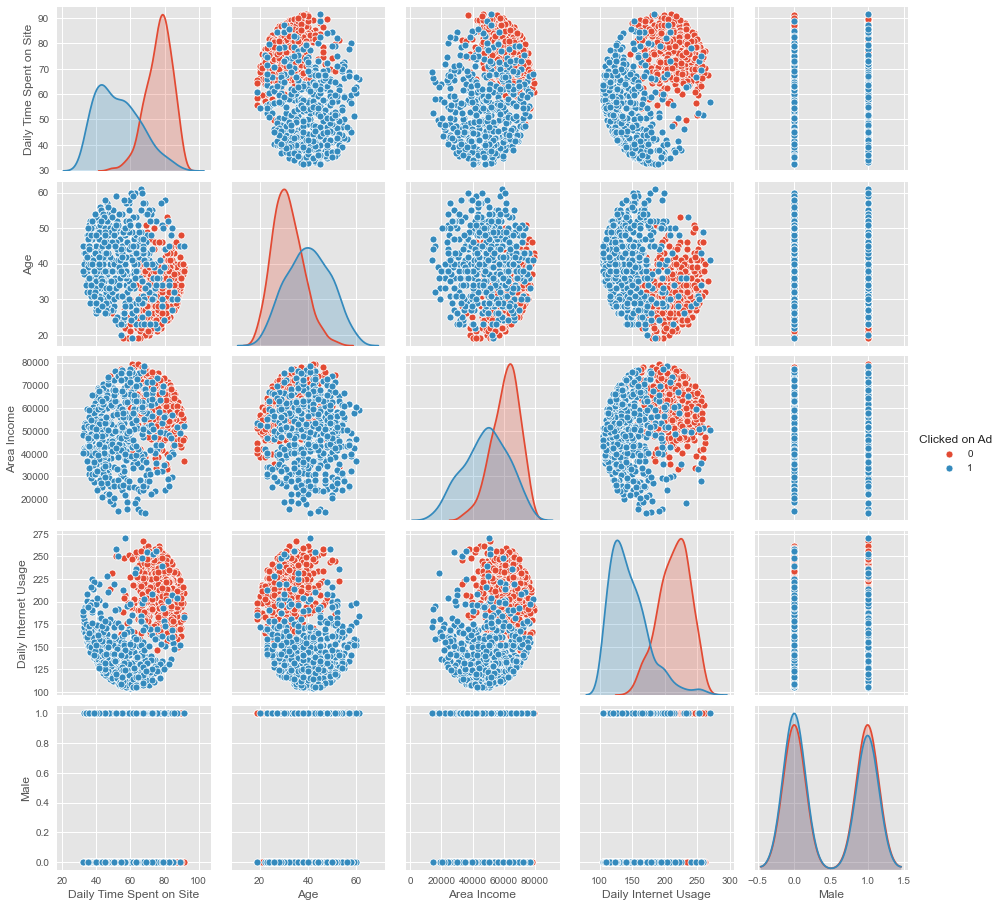

In [66]:
sns.pairplot(df,hue='Clicked on Ad')

In [67]:
from sklearn.model_selection import train_test_split


In [68]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [71]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(lr,X,y,cv=6)
print('cross validation scores:',cv_scores)
print('average of cross validation scores: {:.3f}'.format(np.mean(cv_scores)))

cross validation scores: [0.95808383 0.88023952 0.89221557 0.90419162 0.88554217 0.90963855]
average of cross validation scores: 0.905


In [72]:
from sklearn.model_selection import validation_curve


In [73]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

iris=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=.4, random_state = 3)
clf=DecisionTreeClassifier().fit(X_train,y_train)

print('accuracy of Decision tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))
print('accuracy of Decision tree classifier on test     set: {:.2f}'.format(clf.score(X_test,y_test)))



accuracy of Decision tree classifier on training set: 1.00
accuracy of Decision tree classifier on test     set: 0.97


In [74]:
clf2=DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

print('accuracy of Decision tree classifier on training set: {:.2f}'.format(clf2.score(X_train,y_train)))
print('accuracy of Decision tree classifier on test     set: {:.2f}'.format(clf2.score(X_test,y_test)))

accuracy of Decision tree classifier on training set: 0.98
accuracy of Decision tree classifier on test     set: 0.95


In [75]:
##plot_decision_tree(clf, iris.feature_names, iris.target_names)
##iris.feature_names
##iris.target_names

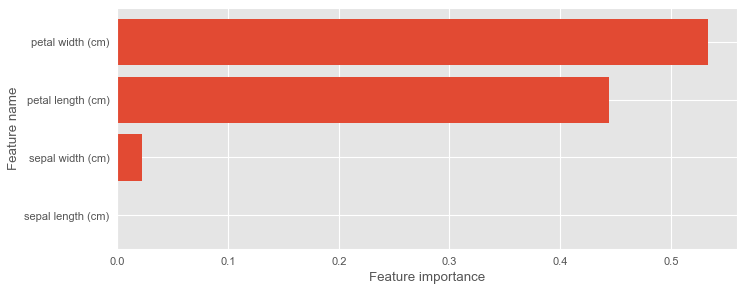

Feature importances: [0.         0.02225519 0.44438595 0.53335886]


In [76]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [77]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
##cancer.feature_names
##cancer.target_names

Accuracy of DecisionTreeClassifier on training data: {:.2f} 0.9530791788856305
Accuracy of DecisionTreeClassifier on test data: {:.2f} 0.9473684210526315


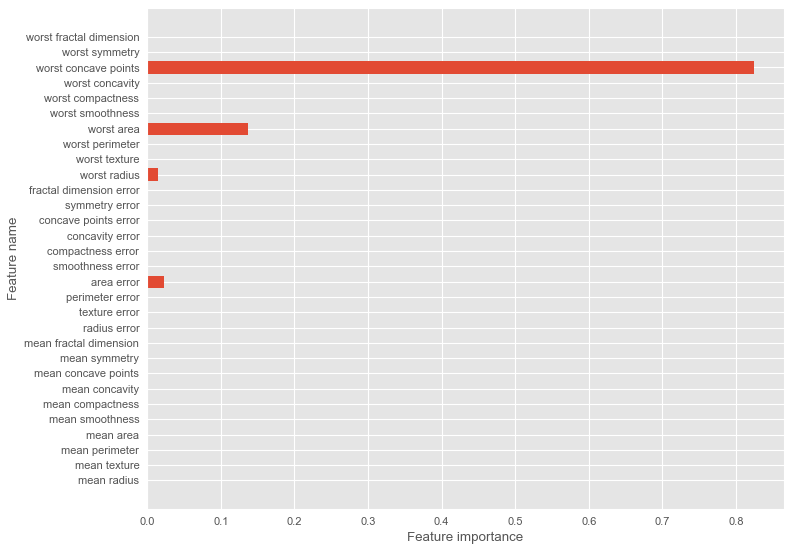

In [78]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_feature_importances
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,test_size=.4, random_state = 3)

clf3=DecisionTreeClassifier(max_depth=3, min_samples_leaf = 8).fit(X_train,y_train)
print('Accuracy of DecisionTreeClassifier on training data: {:.2f}',format(clf3.score(X_train,y_train)))
print('Accuracy of DecisionTreeClassifier on test data: {:.2f}',format(clf3.score(X_test,y_test)))

plt.figure(figsize=(10,7),dpi=80)
plot_feature_importances(clf3,cancer.feature_names)
plt.tight_layout()
plt.show()

# Prediction of employee turnover

In [79]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import seaborn as sns
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [80]:
hr=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Predict-Employee-Turnover-with-scikit-learn-master\\employee_data.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Analysing and Visualising Data

In [81]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


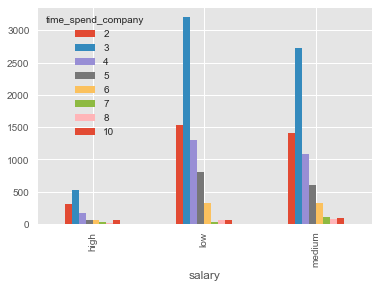

In [82]:
pd.crosstab(hr.salary,hr.time_spend_company).plot(kind='bar')

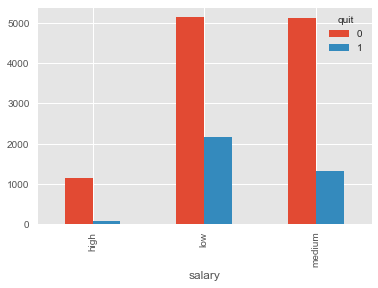

In [83]:
pd.crosstab(hr.salary,hr.quit).plot(kind='bar')

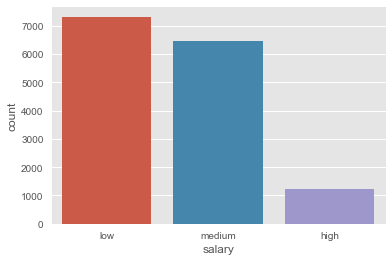

In [84]:
sns.countplot(x='salary',data=hr)

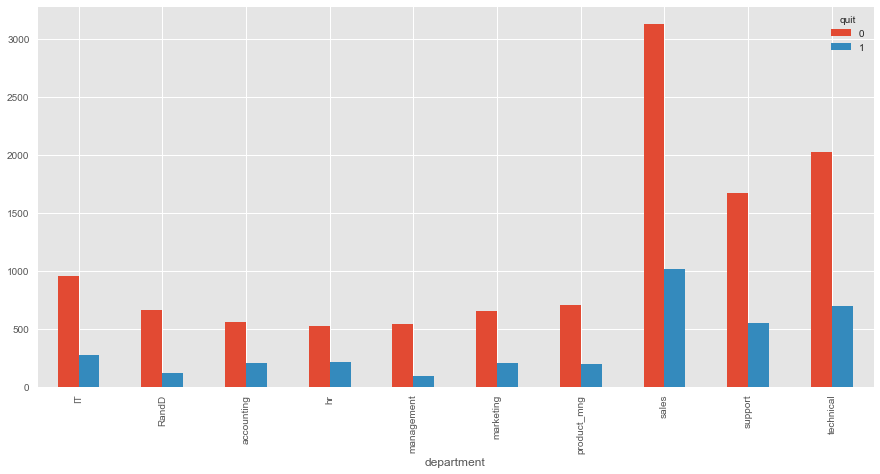

In [85]:
pd.crosstab(hr.department,hr.quit).plot(kind='bar',figsize=(15,7))

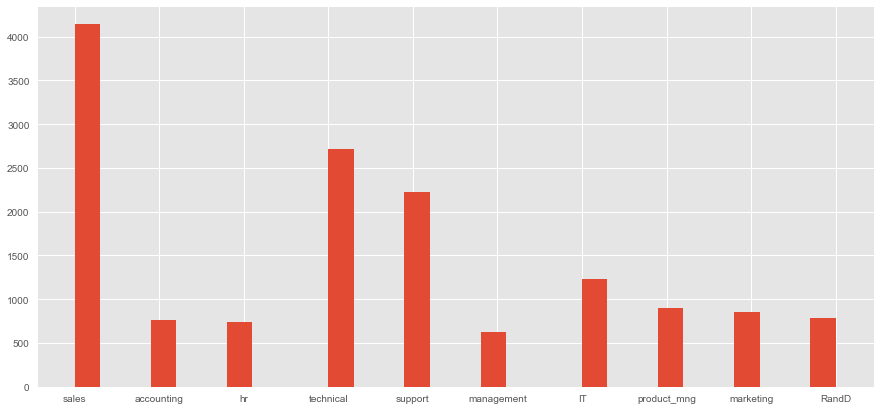

In [86]:
hr['department'].hist(bins=30,figsize=(15,7))

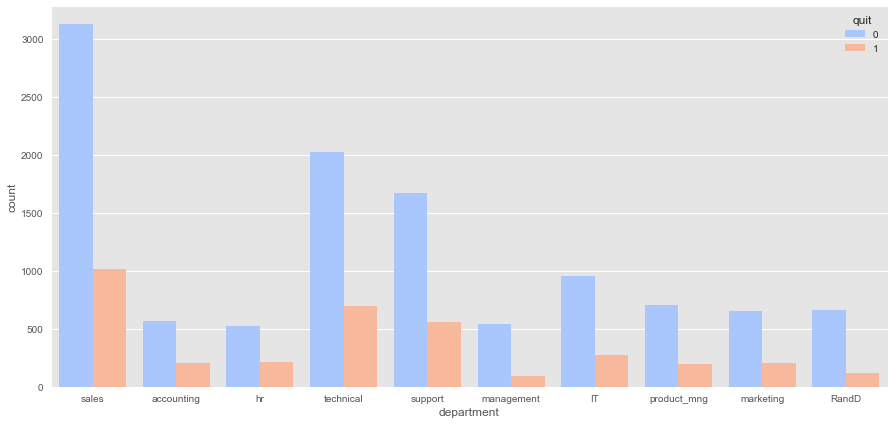

In [87]:
plt.figure(figsize=(15,7))
sns.countplot(x='department',hue='quit',data=hr,palette='coolwarm',saturation=1)

In [88]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [89]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [90]:
hr.drop(columns=['department', 'salary'],axis=1,inplace=True)

# Model Fitting


In [91]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [92]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [93]:
X=hr.loc[:,hr.columns != 'quit']
y=hr.quit

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)
                                                    

In [95]:
conda install graphviz

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Lenovo\Anaconda3\envs\1st_project:
#
graphviz                  2.38                 hfd603c8_2  

Note: you may need to restart the kernel to use updated packages.


In [96]:
@interact
def plot_tree(crit=["gini", "entropy"],
              split=["best", "random"],
              depth=IntSlider(min=1,max=30,value=5, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                       criterion=crit,
                                       splitter = split,
                                       max_depth = depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))

    #graph = Source(tree.export_graphviz(estimator,out_file=None,feature_names=X_train.columns,class_names=['0', '1'],filled = True))
                                        
                                        
                                        
                                        
    
    #display(Image(data=graph.pipe(format='png')))
    
    return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [97]:
@interact
def plot_tree_rf(crit=["gini", "entropy"],
                 bootstrap=["True", "False"],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = RandomForestClassifier(random_state=1,
                                       criterion=crit,
                                       bootstrap=bootstrap,
                                       n_estimators=forests,
                                       max_depth=depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf,
                                       n_jobs=-1,
                                      verbose=False).fit(X_train, y_train)

    print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    num_tree = estimator.estimators_[0]
    print('\nVisualizing Decision Tree:', 0)
    
    #graph = Source(tree.export_graphviz(num_tree,out_file=None,feature_names=X_train.columns, class_names=['0', '1'],filled = True))
                                        
                                        
                                       
                                        
    
    #display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Feature Importance and Evaluation Metrics

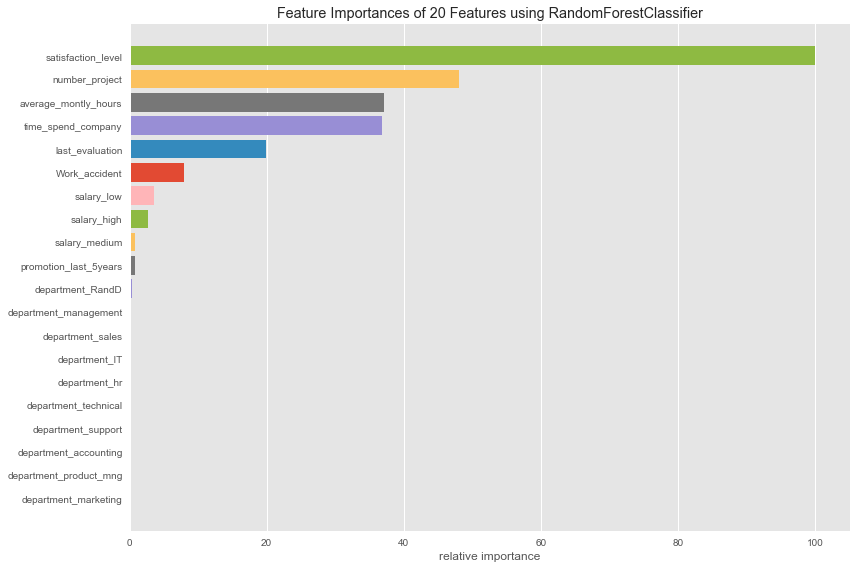

In [98]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0,n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show();

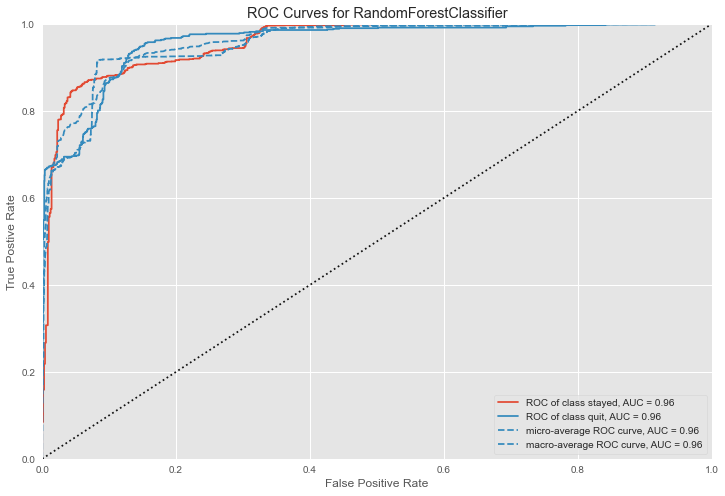

In [99]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf, classes=["stayed","quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();

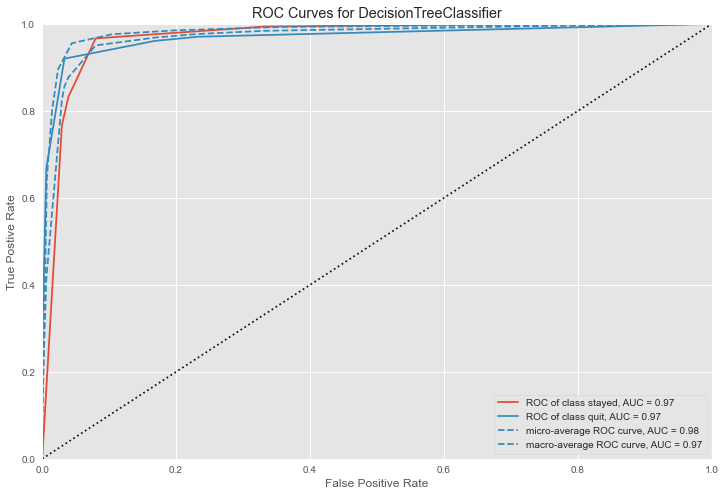

In [100]:
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

visualizer = ROCAUC(dt, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();

# Comparison with LogisticRegressionCV

Logistic Regression Accuracy: 0.792


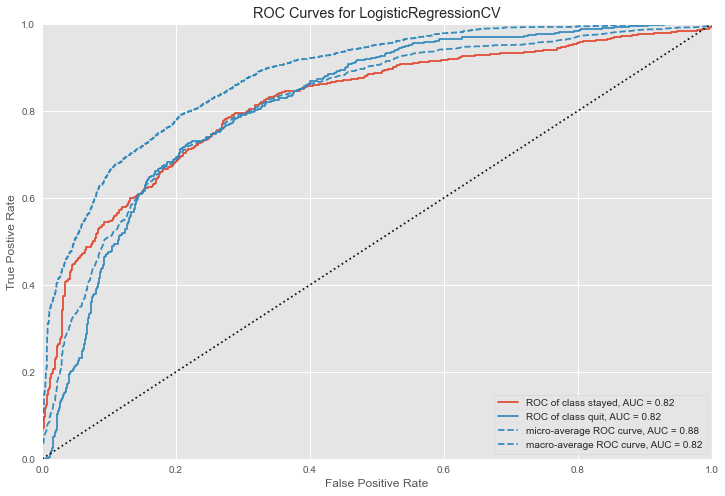

In [103]:
from sklearn.linear_model import LogisticRegressionCV

logit = LogisticRegressionCV(random_state=1, n_jobs=-1,max_iter=500,
                             cv=10)

lr = logit.fit(X_train, y_train)

print('Logistic Regression Accuracy: {:.3f}'.format(accuracy_score(y_test, lr.predict(X_test))))

visualizer = ROCAUC(lr, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();